
# PCA analysis using MACCS

This is some of the data that I used in my masters dissertation. The dimensionality reduction was done in the knime platform where a vector of bit lenght of 166 (MACCS descriptors) was reduced to two variables for each row. This was essential to visualise the chemical space contemplated by each one of the species

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



finalDf = pd.read_csv("C:/Users/steve/Documents/Datasets/dermal/backup/PCA_iterspecies.csv")
print(finalDf.tail(5))
print(finalDf.columns)

finalDf.dtypes

                    Set  PCA dimension 0  PCA dimension 1
939  Porquinho-da-india        -0.445530         2.215900
940  Porquinho-da-india        -1.287901         1.762432
941  Porquinho-da-india         0.434737         1.846457
942  Porquinho-da-india        -1.801036         1.123442
943  Porquinho-da-india         0.090358         2.086601
Index(['Set', 'PCA dimension 0', 'PCA dimension 1'], dtype='object')


Set                 object
PCA dimension 0    float64
PCA dimension 1    float64
dtype: object

The set field is the animal which the chemical compound was tested( rato= rat, coelho=rabbit, Porquinho da índia= guinea pig, figure was done in Portuguese because my dissertation is in Portuguese ).  

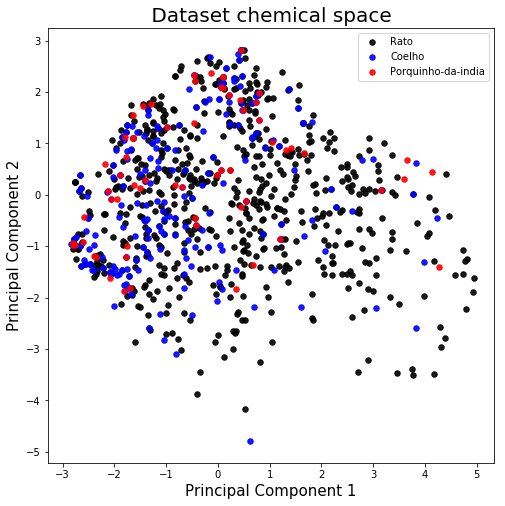

In [10]:
# In this part of the notebook I organized so I could see what compounds were uniquely tested in rats and guinea pigs 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title(' Dataset chemical space ', fontsize = 20)
targets = ['Rato', 'Coelho','Porquinho-da-india']
colors = ['k', 'b', 'r']
alphas= [1,0.4,0.4]

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Set'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA dimension 0']
               , finalDf.loc[indicesToKeep, 'PCA dimension 1']
               , c = color
               , s = 30
               ,alpha=0.9)
ax.legend(targets)
plt.savefig('ax.png')
#ax.grid()
plt.show()

 In black are compounds tested in rats, in blue are compounds tested in rabbits and in red are compounds tested in guinea pigs. 

It was possible to observe that the rat  dataset, which was the most prevalent dataset, was also the dataset with the greatest dispersion in the PCA showing greater structural diversity. It is also possible to observe that the datasets from rabbits and guinea pigs are more clustered, and sets from rats have greater dispersion, covering more chemical spaces than the other two sets(Basically showing there is a greater variety of compounds tested in rats, and only specific types of chemicals were tested in rabbits or guinea pigs).

# Evaluating chemical space of toxic vs nontoxic compounds



In [3]:
finalDf = pd.read_csv("C:/Users/steve/Documents/Datasets/dermal/backup/PCa_fullset_3.csv")
print(finalDf.tail(5))
print(finalDf.columns)
finalDf["GHS"]= finalDf["GHS"].astype(str) 

finalDf.dtypes

     GHS Set  PCA dimension 0  PCA dimension 1
2617   0  es         0.395098         2.153255
2618   0  es        -1.045329         1.122982
2619   0  es        -1.107520         2.346900
2620   0  es         0.286825         2.200528
2621   0  es         1.622196        -1.837947
Index(['GHS', 'Set', 'PCA dimension 0', 'PCA dimension 1'], dtype='object')


GHS                 object
Set                 object
PCA dimension 0    float64
PCA dimension 1    float64
dtype: object

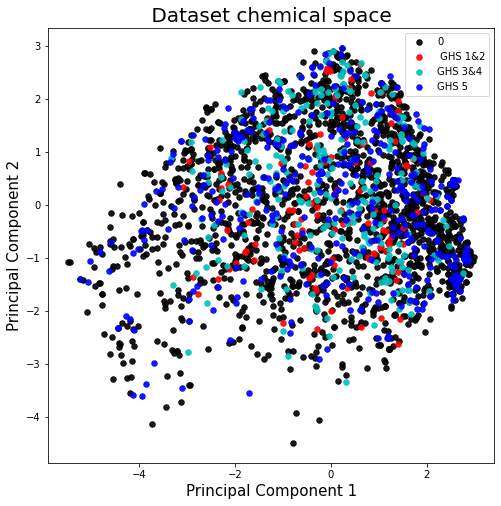

In [4]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title(' Dataset chemical space ', fontsize = 20)
targets = ['0',' GHS 1&2','GHS 3&4','GHS 5']
colors = ['k', 'r', 'c','b']
alphas= [1,0.4,0.4,0.4,]

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['GHS'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA dimension 0']
               , finalDf.loc[indicesToKeep, 'PCA dimension 1']
               , c = color
               , s = 30
               ,alpha=0.9)
ax.legend(targets)
plt.savefig('ax.png')
#ax.grid()
plt.show()

 In the image, the red dots represent very toxic compounds, turquoise dots represent moderatly toxic compounds and both blue and black dots represent nontoxic compounds. The difference between the non-toxic compounds in blue and in black is that the the black dots weren't used in the modelling set and the ones in blue were.
 
  This graph shows that there is greater structural diversity among non-toxic compoundsc than among the toxic compounds.
 It is also possible to see clustering most of the toxic compounds, showing that there is structural similarity between these compounds, which is a great indicator that a model will be able to detect patterns associated with the toxicity of the chemicals.



# Sampling of the dataset to avoid overfitting

When building a classifier, if the number of entries of one class vastly surpasses the other(s), usually leads to an overfit model. For this reason in this work I balanced the number of compounds in each class so it would match the compounds in the other class, through undersampling.

The  undersampling was done to the majority class, in a way to preserve the chemical space originally contemplated. In this case organized the rows by its characteristics (similarity) and then sampled the data linearly. 

There are other ways to balance the dataset such as smote, however every time I use it the model becomes overfit. Chosing the way to balance classes depends a lot in the problem and the dataset you are using. 


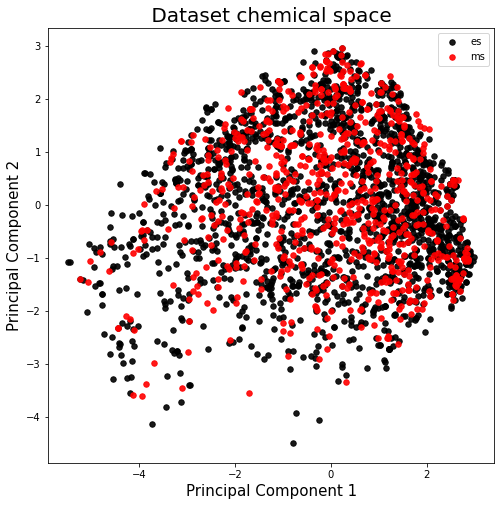

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title(' Dataset chemical space ', fontsize = 20)
targets = ['es','ms']
colors = ['k', 'r' ]
alphas= [1,0.4,]

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Set'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA dimension 0']
               , finalDf.loc[indicesToKeep, 'PCA dimension 1']
               , c = color
               , s = 30
               ,alpha=0.9)
ax.legend(targets)
plt.savefig('ax.png')
#ax.grid()
plt.show()

This figure shows that the compounds selected to participate in the modeling set(ms, in red) cover all the chemical space with very few spaces non covered showing that the sampling done was adequate. The compounds in black are the componds that weren't used in the modeling and labeled as an extra set(es)